# Height - Weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
x=pd.DataFrame(df.Height)

In [5]:
y=pd.DataFrame(df.Weight)
x['intercept']=1

<AxesSubplot:xlabel='Height', ylabel='Weight'>

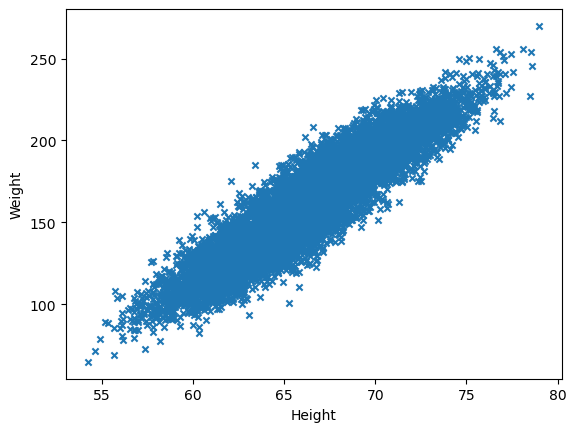

In [6]:
df.plot(x='Height',y='Weight',kind="scatter",marker="x")

In [7]:
X=np.array(x)
Y=np.array(y).flatten()

In [8]:
theta = np.array([0, 0],dtype=np.float128) 

In [9]:
h=X.dot(theta)

In [10]:
def cost(x,y,t):
    m=len(y)
    j=np.sum((x.dot(theta)-y)**2)/(2*m)
    return j

In [11]:
cost(X,Y,theta)

13546.9187872807879085

In [12]:
epochs=1500
alpha=0.0001
m=len(y)

In [13]:
def gradescent(x,y,theta,alpha,epoch,m):
    cost_hist = [0] * epoch
    for i in range(epoch):
        hypo = x.dot(theta)
        loss = hypo-y
        grad  = x.T.dot(loss)/m
        theta = theta - alpha*grad
        costs = cost(x,y,theta)
        cost_hist[i] = costs
    return theta,cost_hist

In [14]:
(t,c)=gradescent(X,Y,theta,alpha,epochs,m)

In [15]:
t

array([ 2.452308  , -0.13935515], dtype=float128)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
m=len(X_train)
theta = np.array([0, 0],dtype=np.float128) 
(theta,cost) = gradescent(X_train,y_train,theta,alpha,1000,m)
theta

array([ 2.44993975, -0.08026942], dtype=float128)

In [18]:
 y_pred = X_test.dot(theta)

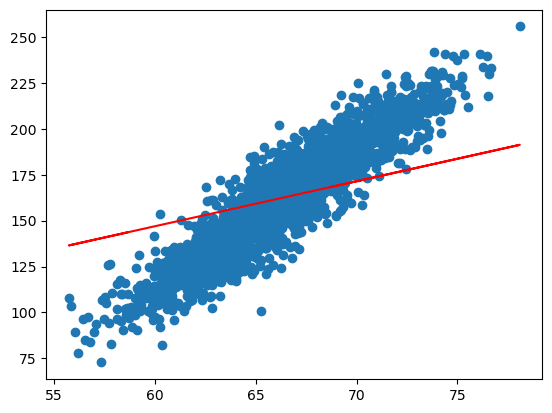

In [19]:
plt.scatter(X_test[:,0],y_test)
plt.plot(X_test[:,0],y_pred,color='red')

Let us try with sklearn now

In [20]:
df=pd.read_csv('weight-height.csv')

In [21]:
df = df.drop(columns=['Gender'])

In [22]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [23]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [24]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [28]:
y_test

array([173.11581259, 195.1620421 , 170.21745116, ..., 125.17937963,
       187.57349377, 102.46908678])

In [29]:
pred

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

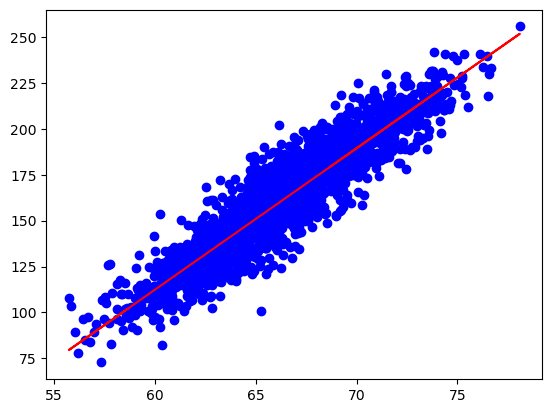

In [30]:
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
      
plt.show()

# House Price

In [31]:
df=pd.read_csv("houseprice.csv")

In [32]:
df

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [33]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [34]:
x

array([[ 8450],
       [ 9600],
       [11250],
       ...,
       [ 9042],
       [ 9717],
       [ 9937]])

In [35]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [39]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [40]:
pred

array([177091.37513814, 184435.82562445, 178135.12057425, 170565.09872995,
       185663.08674164, 163857.21826236, 190942.98581587, 165365.48776619,
       164707.88990901, 192483.75288822, 173034.91393774, 179851.75684096,
       195416.18054204, 180450.09442613, 176420.39592922, 178064.39057217,
       176766.39945291, 174388.34208566, 176802.72026479, 181394.43553499,
       186097.02486251, 178211.58544136, 177510.02028559, 172224.38634633,
       178244.08300989, 176093.5086223 , 178018.5116519 , 197591.60601144,
       181727.05770694, 169093.150038  , 175225.63238056, 181317.97066788,
       195473.52919238, 177207.98406049, 186815.79461338, 178593.90977693,
       174770.66642123, 176682.28809908, 188803.88115835, 185288.40889278,
       172935.50961049, 177982.19084002, 179660.59467318, 185292.23213613,
       180018.06792694, 179932.04495143, 175917.63942794, 175806.76537062,
       186771.82731479, 182692.42665425, 174770.66642123, 179777.20359553,
       166101.46211216, 1

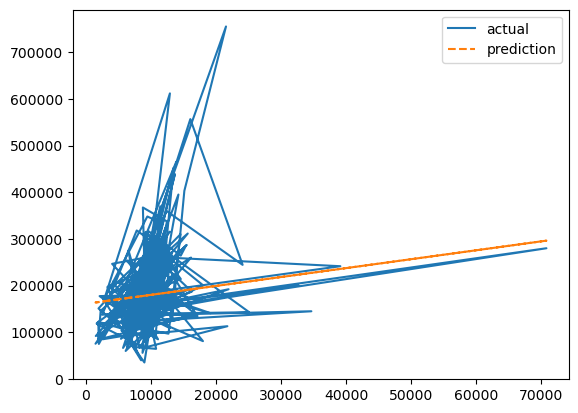

In [41]:
plt.plot(X_test, y_test, label = "actual", linestyle="-")
plt.plot(X_test, pred, label = "prediction", linestyle="--")
plt.legend()
plt.show()

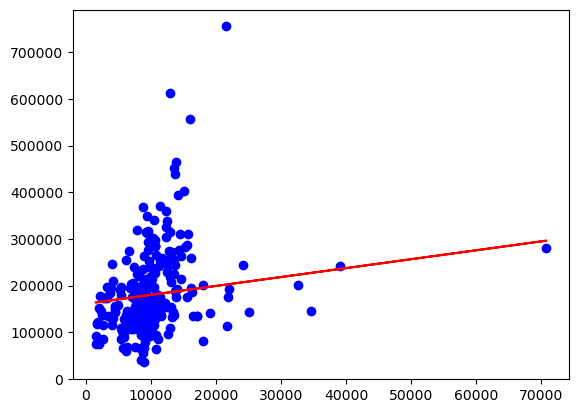

In [42]:
plt.scatter(X_test, y_test, color = 'blue' )
plt.plot( X_test, pred, color = 'red' )
      
plt.show()

# House Price 2 (MultiLinear regression)

In [43]:
df=pd.read_csv("housePrice2.csv")

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df.shape

(1460, 81)

In [46]:
df=df._get_numeric_data()

In [47]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [48]:
df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [49]:
df.dropna(axis=1,inplace=True)

In [50]:
df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [51]:
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [52]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
pred = model.predict(X_test)

In [57]:
y_test

array([154500, 325000, 115000, 159000, 315500,  75500, 311500, 146000,
        84500, 135500, 145000, 130000,  81000, 214000, 181000, 134500,
       183500, 135000, 118400, 226000, 155000, 210000, 173500, 129000,
       192000, 153900, 181134, 141000, 181000, 208900, 127000, 284000,
       200500, 135750, 255000, 140000, 138000, 219500, 310000,  97000,
       114500, 205000, 119500, 253293, 128500, 117500, 115000, 127000,
       451950, 144000, 119000, 196000, 115000, 287000, 144500, 260000,
       213000, 175000, 107000, 107500,  68500, 154000, 317000, 264132,
       283463, 243000, 109000, 305000,  93500, 176000, 118858, 134000,
       109008,  93500, 611657, 173000, 348000, 341000, 141000, 124900,
       118000,  67000, 113000,  91300, 149500, 133000, 266000, 190000,
       155900, 155835, 153500, 152000, 124500, 301000, 136500, 169990,
       205000, 183900, 204900, 260000, 163500, 224900, 244000, 132000,
       194000, 156500, 156000, 275000, 145000, 135000,  60000, 124000,
      

In [58]:
pred

array([157222.21137648, 309291.85482112, 114598.6133378 , 180229.56636861,
       300083.33073562,  47303.59597886, 229889.11969308, 148224.79002733,
        43895.5705517 , 152117.67661569, 156343.03714489, 113457.84974331,
        79900.6844369 , 210706.32331361, 189896.92138077, 142991.07998731,
       214649.07130887, 138199.67803343, 118651.29749713, 233747.18567727,
       184346.24501677, 215618.61501984, 192442.31275666, 132460.62796651,
       213732.78576558, 154275.2514858 , 199994.54883284,  88652.46327444,
       185003.00846824, 183958.58521521, 116885.44362374, 271204.27439104,
       232878.89511853,  90314.33435479, 269555.9179425 , 164631.38356017,
       150305.3831347 , 219128.11186621, 307338.24132552,  89362.81060829,
       132122.02254054, 251943.46935345, 103269.72064563, 277448.14954536,
       128830.99244071, 131085.73637731, 102875.84833377, 132474.08182493,
       360254.3323354 , 128168.50784543, 107292.08696417, 219034.00578368,
        94262.87388764, 3